#### Makemore

#### About:

* Makemore takes one text file as input, where each line is assumed to be one training thing, and generates more things like it. 
* Under the hood, it is an autoregressive character-level language model, with a wide choice of models from bigrams all the way to a Transformer (exactly as seen in GPT). For example, we can feed it a database of names, and makemore will generate cool baby name ideas that all sound name-like, but are not already existing names. 
* If we feed it a database of company names then we can generate new ideas for a name of a company. Or we can just feed it valid scrabble words and generate english-like babble.

Character-Level-Language Model: it is treating each character as a sequence, it models the sequence of characters and predicts the next character.

The following language models will be implemented in NN:
1) Bigram (one character predicts the next one with a lookup table of counts)
2) MLP, following [Bengio et al. 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)
3) CNN, following [DeepMind WaveNet 2016](https://arxiv.org/abs/1609.03499)
4) RNN, following [Mikolov et al. 2010](https://www.fit.vutbr.cz/research/groups/speech/publi/2010/mikolov_interspeech2010_IS100722.pdf)
5) LSTM, following [Graves et al. 2014](https://arxiv.org/abs/1308.0850)
6) GRU, following [Kyunghyun Cho et al. 2014](https://arxiv.org/abs/1409.1259)
7) Transformer, following [Vaswani et al. 2017](https://arxiv.org/abs/1706.03762)

@refer: https://github.com/karpathy/makemore

In [68]:
# lets get our data

words = open('datasets/names.txt').read().splitlines()
print(words[:10])  # Print the first 10 words to verify
print(f"Total words loaded: {len(words)}")

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Total words loaded: 32033


In [51]:
min(len(word) for word in words)

2

In [52]:
max(len(word) for word in words)

15

The character sequence model is predicting the next character in a sequence given an already some concrete sequence of characters before it.

### 1) Bi-gram Model:

In this language model we are always working with just two characters at a time, we are only looking at one character that we are given and then we try to predict the next character in the sequence.

* Here we are predicting what characters are likely to follow a particular letter and avoiding the contect of all the next previous letters.
* As its just using the previous letter to predict the next letter, its a week model.
* Given a name "emma" we have to note that letter 'e' is likely to come first and letter 'a' is also likely to come at the end. 

In [69]:
import torch

# N represents the count of occurrences of each bigram
N = torch.zeros((27, 27), dtype=torch.int32)
# this will have 26 alphabets and 2 special characters <S> and <E>

chars = sorted(list(set(''.join(words))))
print(f"Unique characters: {chars}")

# string to index mapping 
stoi = { ch:i+1 for i,ch in enumerate(chars)}
stoi['.'] = 0
print(f"String to index mapping: {stoi}")

Unique characters: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
String to index mapping: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [70]:

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for x1, x2 in zip(chs,chs[1:]):
        x1 = stoi[x1]
        x2 = stoi[x2]
        N[x1,x2] += 1

print(N)


tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

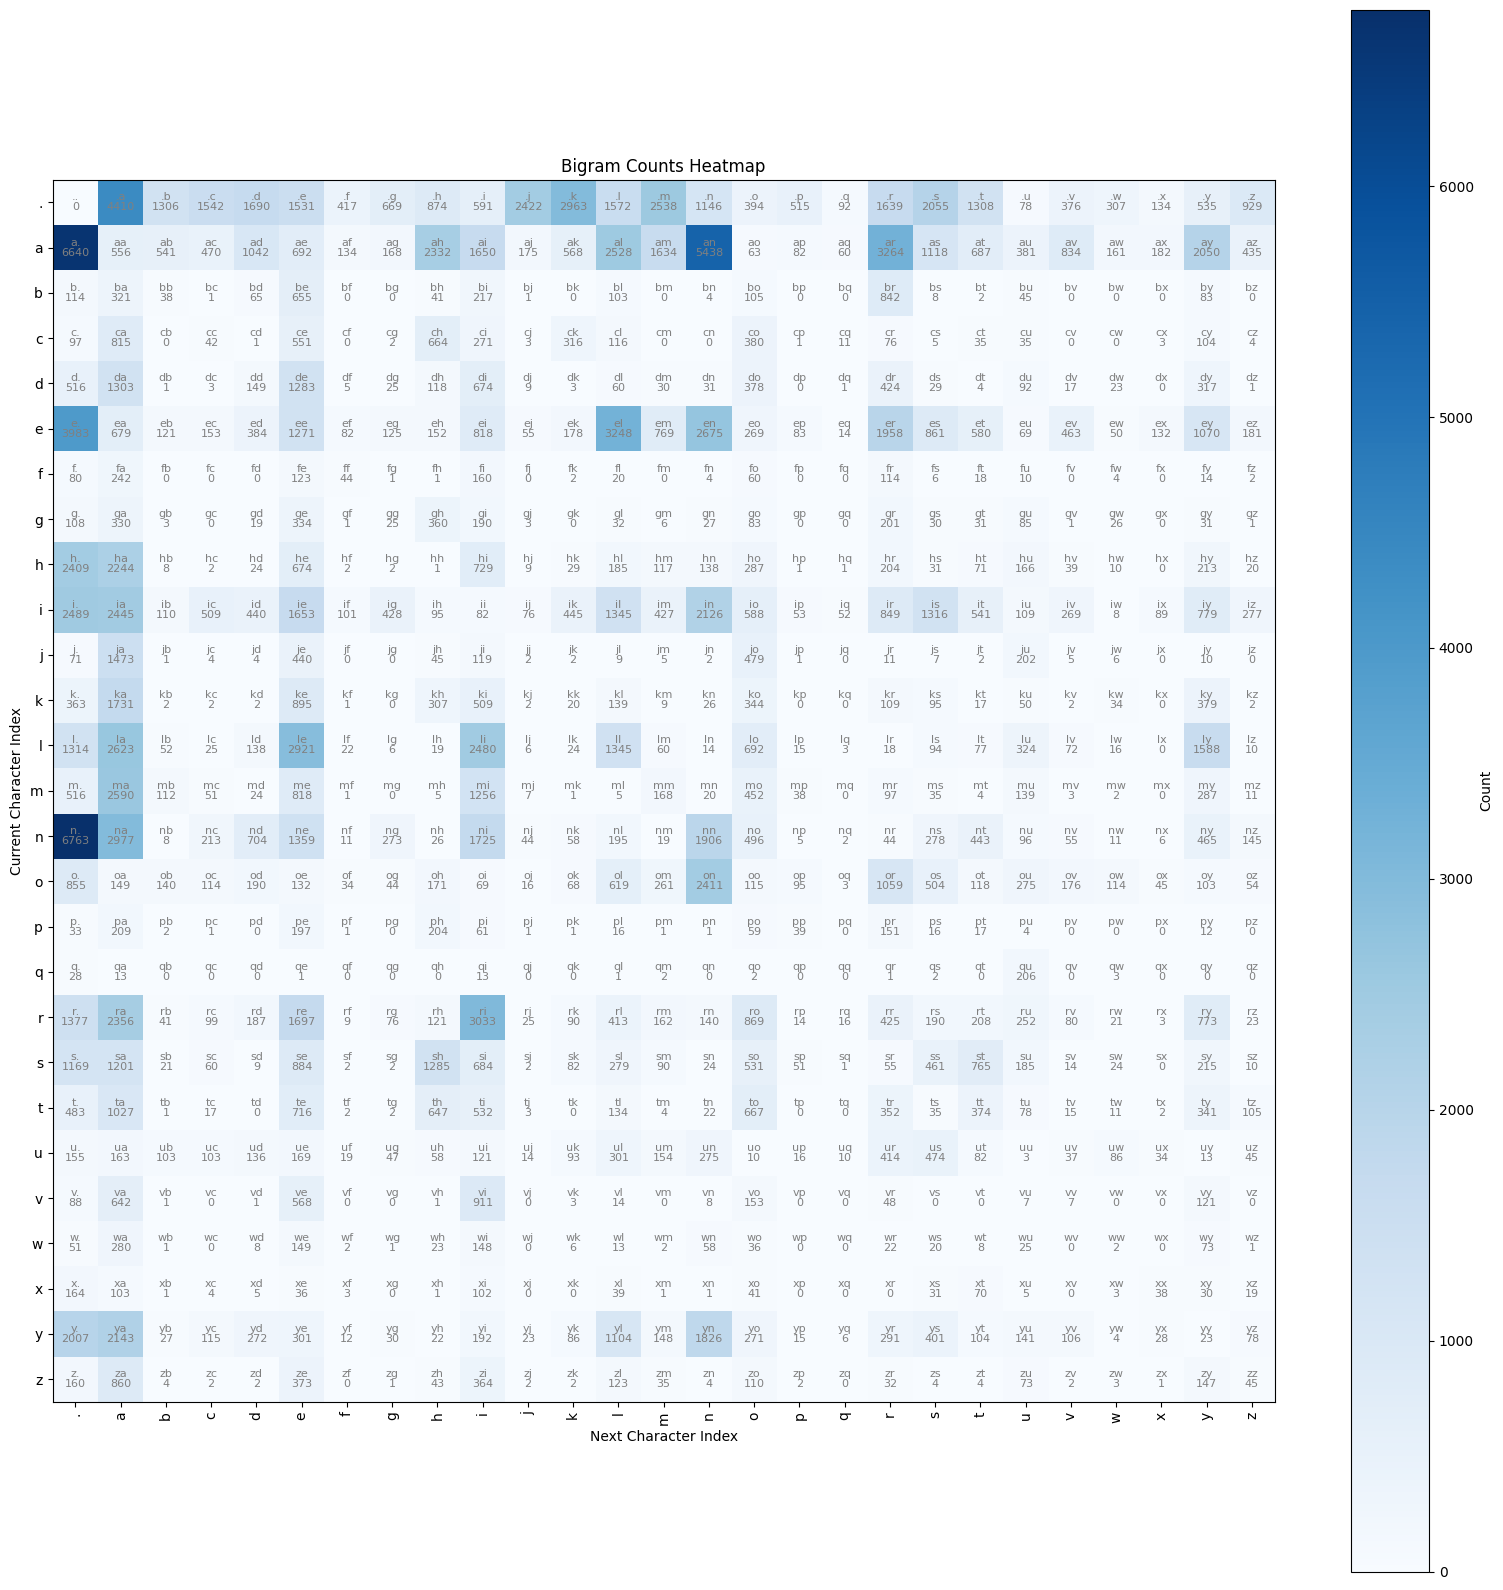

In [55]:
import matplotlib.pyplot as plt

itos = {i:ch for ch,i in stoi.items()}

plt.figure(figsize=(16,16))
plt.title('Bigram Counts Heatmap')
plt.xlabel('Next Character Index')
plt.ylabel('Current Character Index')
plt.imshow(N.numpy(), cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray', fontsize=8)
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray', fontsize=8)
        
plt.xticks(range(27), [itos[i] for i in range(27)], rotation=90)
plt.yticks(range(27), [itos[i] for i in range(27)])
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()

In [56]:
print('This is the first letter count ',N[0, :].numpy())
print('Last Letter Count', N[:, 0].numpy())

This is the first letter count  [   0 4410 1306 1542 1690 1531  417  669  874  591 2422 2963 1572 2538
 1146  394  515   92 1639 2055 1308   78  376  307  134  535  929]
Last Letter Count [   0 6640  114   97  516 3983   80  108 2409 2489   71  363 1314  516
 6763  855   33   28 1377 1169  483  155   88   51  164 2007  160]


In [71]:
# sampling from the first letter distribution

p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

To sample from the distribution we will use torch.multinomial

In [72]:
g = torch.Generator().manual_seed(2147483647)  # Set a seed for reproducibility
# p = torch.rand(3, generator=g)
# print(p)

In [ ]:
# so here if we see the p = [0.7081, 0.3542, 0.1054], 
# 0 will be sampled with a probability of 0.7081, 1 with 0.3542, and 2 with 0.1054 
# in mutlinomial sampling

index = torch.multinomial(p, num_samples=20, replacement=True, generator=g).item()


Now as we see 13 -> m was choosen now after selecting the m we go to the row 'm' to get the next character. and then to that row to get the third character in a loop.

In broadcasting we align all the dimensions on the right and then we go from right to left, if a dimension is not present it will make it as 1 and then it will vertically or horizontally replicate the data.

example:

P = 27,27
Q = 27       (q = p.sum(1)) this will not keep the dimension

So what happens internally,
First align them to the right.
P = 27, 27
Q = 1, 27

Then we go from right to left to see if the dimensions match or not.
Here in the last (right to left), we have 1 that will be replace with 27; how?

it will replicate the [1,27] vertically 
lets say this was our array [1,2,3,4], it will output it as   
[1,2,3,4]   
[1,2,3,4]    
[1,2,3,4]    
[1,2,3,4]    

P = 27,27
Q = 27, 1       (q = p.sum(1,keepdim=True)) this will keep the dimension

here it will be   
[[1],  
 [2],  
 [3],  
 [4]].  

now this will be replicated horizontaly

[[1,1,1,1],  
 [2,2,2,2],  
[3,3,3,3],  
[4,4,4,4]]. 


Under the hood, the operations 
P = P / P.sum(dim=1, keepdim=True) # creates a new memory 

Use inplace operations which do not create a new array in memory
P /= P.sum(dim=1, keepdim=True)

In [73]:
# this will make sure there are no 0 count in our bi-grams
P = (N+1).float()
print(P.sum(dim=1, keepdim=True))
P /= P.sum(dim=1, keepdim=True)  # Normalizing each row (broadcasting)
  # This should be close to 1 for each row

tensor([[32060.],
        [33912.],
        [ 2672.],
        [ 3559.],
        [ 5523.],
        [20450.],
        [  932.],
        [ 1954.],
        [ 7643.],
        [17728.],
        [ 2927.],
        [ 5067.],
        [13985.],
        [ 6669.],
        [18354.],
        [ 7961.],
        [ 1053.],
        [  299.],
        [12727.],
        [ 8133.],
        [ 5597.],
        [ 3162.],
        [ 2600.],
        [  956.],
        [  724.],
        [ 9803.],
        [ 2425.]])


In [74]:
index = 0

for i in range(7):

    new_name = ""

    while True:
        p = P[index]
        # p = N[index].float()
        # p = p/p.sum()
        index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if index == 0:  # Stop as we hit the end token
            break
        new_name += itos[index]

    print(new_name)


cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai


How good is our model bi-gram model ?

How can we summarize these probabilities into a single value which measures the quality of the model.

Maximum likelihood estimation, method to estimate the parameters of a statistical model by maximizing the likelihood that the observed data was generated by the model.

Here it is the product of all the probabilities of the entire dataset, assigned by the model we have trained which represents the measure of quality. If its a good model, the product of probablity of all the outputs should be very high.

We will get log(likelyhood) as these are small numbers.

log(p1 * p2 * p3)  = log(p1) + log(p2) + log(p3)

And we will get the negative loglikelyhood. where lower the value better our model is and higher the value worse is our model.

In [75]:
log_prob = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for x1, x2 in zip(chs,chs[1:]):
        x_1 = stoi[x1]
        x_2 = stoi[x2]
        prob = P[x_1, x_2]
        log_prob += torch.log(prob)
        n += 1
        # print(f'{x1}{x2} = {prob:.4f} {log_prob:.4f} ')

nll_avg = -log_prob/n
print('The lower it is the better of we are, and higher it is the worse we are')
print(f'Negative Log Likelihood: {nll_avg:.4f}')


The lower it is the better of we are, and higher it is the worse we are
Negative Log Likelihood: 2.4544


### Bi-Gram Neural Network:

Now our neural network is still going to be a bigram language model. Where we input our single character and there is neural network with some weights/paramters and it is going to output the probability distribution of the next character in the sequence. Which is what character is more likely to follow given this input to the model.

How high is the probability the model assigns to that character, we will be tuning these probablities as we want them high (another way of saying the loss is low). We will use gradient based optimizations to tune the parameters of the network.

So we have the loss function, and we will minimize it by tuning the weights (updating the probabilities of all those bi-grams)

In [ ]:
# Creating a Training Set of Bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] 
    for x1, x2 in zip(chs,chs[1:]):
        x_1 = stoi[x1]
        x_2 = stoi[x2]

        xs.append(x_1)
        ys.append(x_2)

xs = torch.tensor(xs, dtype=torch.int64)
ys = torch.tensor(ys, dtype=torch.int64)

print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


Each of these will be an input to our neural network.

We will not input these numbers rather we will input the 5 represented as [0,0,0,0,0,1,0,0...] size of 27 which will be fed to the NN.

In [77]:
import torch.nn.functional as F 

# Inputs to Neural Network has to be floating point numbers and not integers.

x_enc = F.one_hot(xs, num_classes=27).float() 

In [78]:
# here we are getting 27 inputs and 27 outputs which means we have 
# 27 neurons with each neuron getting 27 inputs.
W = torch.randn((27,27), requires_grad=True)  # Weight matrix for the bigram model
 
W.dtype
# x_enc.dtype
(x_enc @ W)[3, 13] 
# this tells us the 13 th neuron firing value when the 3rd input 'm' -> 13 is feed.


tensor(-0.4962, grad_fn=<SelectBackward0>)

In [ ]:
x_enc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
W[:, 13] 
# here we are taking the 13th column which represents the weights of the 13th neuron

tensor([ 0.1877, -1.0440, -0.6922,  1.8144,  1.1463,  0.6771, -1.7529, -0.6098,
         0.6269, -0.6680, -0.1782, -3.0116, -1.1975, -1.3155, -0.9102,  0.5842,
        -0.1676,  0.4013,  0.1187,  2.1315,  1.2509,  0.8102,  0.8614, -0.2686,
        -2.2865, -0.4886, -1.3186], grad_fn=<SelectBackward0>)

In [ ]:
x_enc[3] @ W[:, 13] # @ -> mul().sum() 

tensor(-1.3155, grad_fn=<DotBackward0>)

In [ ]:
logits = x_enc @ W # these are log(counts) of each of the bi-grams
counts = logits.exp()  # Convert logits to counts
probs = counts/counts.sum(dim=1, keepdim=True)

print(probs.shape)
probs

torch.Size([5, 27])


tensor([[0.0238, 0.0030, 0.1086, 0.0317, 0.0638, 0.0463, 0.0254, 0.0042, 0.0323,
         0.0144, 0.0461, 0.0812, 0.0891, 0.0340, 0.0320, 0.0095, 0.0196, 0.0399,
         0.0039, 0.0168, 0.0326, 0.0460, 0.0860, 0.0165, 0.0222, 0.0496, 0.0213],
        [0.0550, 0.0399, 0.0110, 0.0063, 0.0623, 0.0145, 0.0314, 0.1354, 0.0143,
         0.0187, 0.0077, 0.0113, 0.0109, 0.0759, 0.0320, 0.0402, 0.0134, 0.0614,
         0.0447, 0.0259, 0.0434, 0.0276, 0.0928, 0.0269, 0.0235, 0.0315, 0.0421],
        [0.0401, 0.0251, 0.0137, 0.0170, 0.0162, 0.0027, 0.2170, 0.0467, 0.2795,
         0.0167, 0.0040, 0.0100, 0.0082, 0.0066, 0.0244, 0.0035, 0.0178, 0.0214,
         0.0153, 0.0108, 0.0184, 0.0427, 0.0394, 0.0143, 0.0378, 0.0228, 0.0279],
        [0.0401, 0.0251, 0.0137, 0.0170, 0.0162, 0.0027, 0.2170, 0.0467, 0.2795,
         0.0167, 0.0040, 0.0100, 0.0082, 0.0066, 0.0244, 0.0035, 0.0178, 0.0214,
         0.0153, 0.0108, 0.0184, 0.0427, 0.0394, 0.0143, 0.0378, 0.0228, 0.0279],
        [0.0126, 0.0176,

Lets Organize our data for our reference

In [79]:
g = torch.Generator().manual_seed(2147483647)  # Set a seed for reproducibility
W = torch.randn((27,27), generator=g ,requires_grad=True)  # 27 neurons with 27 inputs each

x_enc = F.one_hot(xs, num_classes=27).float()
logits = x_enc @ W
counts = logits.exp()  # Convert logits to counts
probs = counts/counts.sum(dim=1, keepdim=True)

In [80]:
nlls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()

    print()
    print(f' bi-gram example {i+1}: {itos[x]}{itos[y]}')
    print('Input to the neural network:', x)
    print('Probabilities:', probs[i])

    print(f'Actual next character: {itos[y]} with {y} index')
    
    print(f'Predicted next character: {itos[probs[i].argmax().item()]} with {probs[i].argmax().item()} index')

    print(f'Probability of the actual next character: {probs[i, y].item():.4f}')

    logp = torch.log(probs[i, y])   
    # print(f'Log probability of the actual next character: {logp.item():.4f}')
    nlls[i] = -logp.item()
    print(f'Negative Log probability of the actual next character: {nlls[i]:.4f}')
    print()

print(f'Average Negative Log Likelihood for the first 5 bigrams: {nlls.mean().item():.4f}')







 bi-gram example 1: .e
Input to the neural network: 0
Probabilities: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
Actual next character: e with 5 index
Predicted next character: o with 15 index
Probability of the actual next character: 0.0123
Negative Log probability of the actual next character: 4.3993


 bi-gram example 2: em
Input to the neural network: 5
Probabilities: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
Actual next character: m with 13 index
Predicted next character: d with 4 index
Probability of the actual next charact

Loss summarizes the quality of the neural net.

In [ ]:
# To get the probablities of the next character given 
# This gives the probablity of the expected output for each input 
# like for '.' it will get the probability for the 'character' 'e' which is the 1st bigram in
# our dataset.
loss = -probs[torch.arange(5),ys].log().mean().item() 
loss

4.108682155609131

In [ ]:
# forward pass

logits = x_enc @ W # these are log(counts) of each of the bi-grams
counts = logits.exp()  # Convert logits to counts
probs = counts/counts.sum(dim=1, keepdim=True)
loss = -probs[torch.arange(5),ys].log().mean()

In [ ]:
# backward pass
W.grad = None # Reset gradients before backward pass, this is more efficient
loss.backward()

W.data += -0.1 * W.grad
   

In [ ]:
loss

tensor(3.7492, grad_fn=<NegBackward0>)

In [ ]:
loss

tensor(3.7292, grad_fn=<NegBackward0>)

### Final Training of Neural Network

In [96]:
# Creating a Training Set of Bigrams (x,y)

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for x1, x2 in zip(chs,chs[1:]):
        x_1 = stoi[x1]
        x_2 = stoi[x2]

        xs.append(x_1)
        ys.append(x_2)

xs = torch.tensor(xs, dtype=torch.int64)
ys = torch.tensor(ys, dtype=torch.int64)

num = xs.nelement()

# print(xs)
# print(ys)

print(f'Number of training examples: {num}')

# Initialize the weight matrix for the bigram model

g = torch.Generator().manual_seed(2147483647)  # Set a seed for reproducibility
W = torch.randn((27,27), generator=g ,requires_grad=True)  # 27 neurons with 27 inputs each



Number of training examples: 228146


In [97]:
# 100 epochs of training
for k in range(100):

    x_enc = F.one_hot(xs, num_classes=27).float()
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1, keepdim=True)

    # this has to be in tensor object, nahi tho backward pass will not work
    # we incentivize W to be close to zero, to prevent overfitting hence we should try to 
    # keep the weights of the model smaller. hence this l2-regularizing term will push/force 
    # the weights to be smaller.
    # But if we have a big regularization term then this will lead to equal probablity distribution 
    # for each of the outputs.
    loss = -probs[torch.arange(num), ys].log().mean() + 1*(W**2).mean()
    print(f'Epoch {k+1}, Loss: {loss.item():.4f}')

    W.grad = None
    loss.backward()

    W.data += -100 * W.grad


Epoch 1, Loss: 4.7255
Epoch 2, Loss: 3.4521
Epoch 3, Loss: 3.1240
Epoch 4, Loss: 2.9953
Epoch 5, Loss: 2.9527
Epoch 6, Loss: 2.9236
Epoch 7, Loss: 2.9307
Epoch 8, Loss: 2.9124
Epoch 9, Loss: 2.9274
Epoch 10, Loss: 2.9139
Epoch 11, Loss: 2.9260
Epoch 12, Loss: 2.9132
Epoch 13, Loss: 2.9251
Epoch 14, Loss: 2.9129
Epoch 15, Loss: 2.9250
Epoch 16, Loss: 2.9127
Epoch 17, Loss: 2.9246
Epoch 18, Loss: 2.9127
Epoch 19, Loss: 2.9248
Epoch 20, Loss: 2.9125
Epoch 21, Loss: 2.9244
Epoch 22, Loss: 2.9125
Epoch 23, Loss: 2.9246
Epoch 24, Loss: 2.9125
Epoch 25, Loss: 2.9244
Epoch 26, Loss: 2.9125
Epoch 27, Loss: 2.9246
Epoch 28, Loss: 2.9124
Epoch 29, Loss: 2.9243
Epoch 30, Loss: 2.9125
Epoch 31, Loss: 2.9246
Epoch 32, Loss: 2.9123
Epoch 33, Loss: 2.9241
Epoch 34, Loss: 2.9124
Epoch 35, Loss: 2.9244
Epoch 36, Loss: 2.9123
Epoch 37, Loss: 2.9242
Epoch 38, Loss: 2.9124
Epoch 39, Loss: 2.9245
Epoch 40, Loss: 2.9123
Epoch 41, Loss: 2.9242
Epoch 42, Loss: 2.9124
Epoch 43, Loss: 2.9244
Epoch 44, Loss: 2.91

If we observe clearly W is nothing but similar to our lookup table (the first approach) which stored the counts of all the bi_grams.

He we have W which is initialzed with random values between -3 to 3 then w.r.t loss we have updated the W which return the probability for our bi-gram.

lets say is the input was 'b' -> 2
[0 0 1 0 0 ..... 0] x W (27x27)

this will return the W[2,:] the 3rd row (or 2nd indexed row) which is nothing but similar to bi-gram lookup table showing the count for next letter at the 3rd row.

The difference is in that lookup table we had count, ** here we have logits ** which are then turned into counts using .exp() and then softmax is applied to find the probablity of the index/alphabet to be occured as next.
 

Another observation is when we set this P = (N+1).float() we tried to smooth out the probability distribution as we increase (N+1000) this will make the probablity much more even.

In a similar way we have our single layer neural network (27 neurons), lets say we have W assigned to 0, then logits = x_enc @ W, will all become zero, and them .exp() them will make them 1, then of-course the probablities will turn out to be uniform.

So if the weights are uniform then the probabilities will turn out to be uniform. ** So trying to incentivize the W ** (You're applying some penalty or constraint in your model to encourage the weights W (parameters) to be close to zero.) to be near zero is basically equivalent to label smoothing.

Why Would You Want Weights Near Zero?

* Prevent Overfitting: Big weights can lead to models that are too complex and overfit the training data. Smaller weights encourage simpler models.
* Regularization: You “incentivize” small weights by adding a regularization term to your loss function.

Loss = nll + lmbda * (W)^2 

This extra term penalizes large weights, nudging the optimizer to prefer smaller values.

In [98]:
# Final sampling from the model.
import torch.nn.functional as F 

# g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = ""

    xi = 0

    while True:

        x_enc = F.one_hot(torch.tensor([xi]),num_classes=27).float()
        # print(x_enc) # 1*27
        logits = x_enc @ W
        # print(logits) # 1*27
        counts = logits.exp()
        p = counts/counts.sum(1, keepdim=True) # softmax function

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out += itos[ix]

        if ix == 0:
            break
    
    print(out)




jjgla.
sadvqrkpkhxzddakcjmlgmrpsgabaekd.
nmrjmasqtsaozeabjgvkahkfjpndkpedeshamtazgawbkmdeybiikctafsihmjqrzd.
egehkejsjsb.
gjolcvltnyqbeasbalyduwpmqkgmmnse.
